In [20]:
pip install geoplot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geoplot as gplt
import geopandas as gpd
import folium

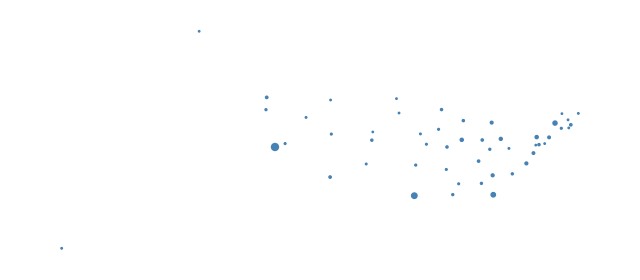

In [5]:
data=pd.read_csv('2019_Census_US_Population_Data.csv')
gdf=gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data.long,data.lat))
gplt.pointplot(gdf,scale='POPESTIMATE2019',limits=(1,5))
plt.show()

<ipython-input-23-639d461369b6>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


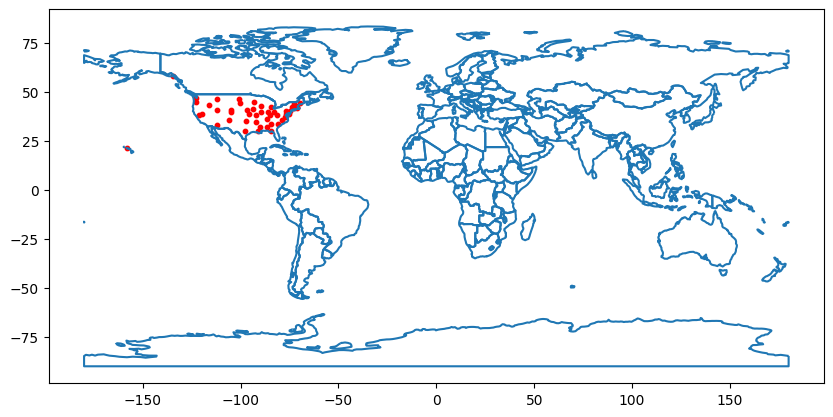

In [23]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=world.boundary.plot(figsize=(10,5))
gdf.plot(ax=ax,color='red',markersize=10)
plt.show()

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:1310: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


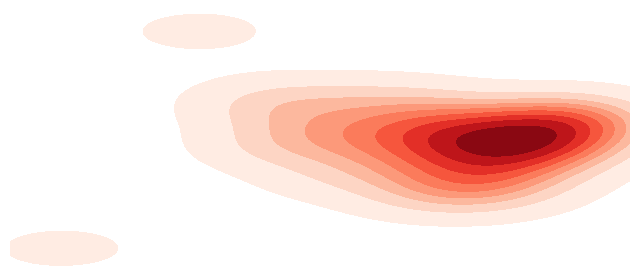

In [26]:




gplt.kdeplot(gdf,cmap='Reds',shade=True)
plt.show()

In [27]:




m=folium.Map(location=[gdf['lat'].mean(),gdf['long'].mean()],zoom_start=4)
from folium.plugins import HeatMap
hea=[[row['lat'],row['long']]for index,row  in gdf.iterrows()]
HeatMap(hea).add_to(m)
m

In [29]:
#( 9 TH EXPERIMENT)
import folium
max_population=data['POPESTIMATE2019'].max()
data['normalized_population']=data['POPESTIMATE2019']/max_population

m=folium.Map(location=[37,-102],zoom_start=4)
for idx,row in data.iterrows():
    folium.CircleMarker(location=[row['lat'],row['long']],
                       radius=2,
                       color='blue',
                       fill='True',
                       fill_color='blue',
                       fill_opacity=0.5,
                       popup=f"State:{row['STATE']}<br>Population:{row['POPESTIMATE2019']}"
                       ).add_to(m)
m